In [17]:
import random
import numpy as np
import pandas as pd
from sklearn import cluster      
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import datasets     
from sklearn import manifold    
from scipy import stats as st
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import kneighbors_graph
from sklearn.manifold import TSNE
from nltk.tokenize import RegexpTokenizer
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MeanShift, estimate_bandwidth
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import scipy.cluster.hierarchy as sch
import fiona

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Preprocesado y modelado Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import sklearn
print(sklearn.__version__)


0.24.2


In [2]:
data = pd.read_csv("dim_clusterizado_bin.csv", encoding = "ISO-8859-1", sep=';')


In [3]:
data.describe()
list(data)
data.head()
data.dtypes

N_ANNO                            int64
DISTRITO                         object
Nombre_Barrio                    object
RATIO_AIRBNB_HECTAREA           float64
PRECIO_M2                         int64
SUPERFCIE_M2                    float64
RATIO_PUERTA                    float64
RATIO_LOCAL_HECTAREA            float64
TAM_HOGAR_MEDIO                 float64
RATIO_HOGARES_1PER              float64
HIPOT_MEDIA                     float64
DENSIDAD_HAB                    float64
EDAD_PROMEDIO                   float64
EDAD_MEDIANA                    float64
PROPOR_ENVEJECIMIENTO           float64
PROPOR_DESOBREENVEJECIMIENTO    float64
IND_ENVEJECIMIENTO              float64
IND_JUVENTUD                    float64
IND_DEPENDENCIA                 float64
IND_ESTRUCTURA_POBLA_ACTIVA     float64
RZ_PROGRESIVIDAD_DEMO           float64
PROPOR_EXTRANJEROS              float64
PROPOR_NACIDOS_FUERA_ESPAÑA     float64
PROPOR_INMIG_EXTRANJ            float64
TOTAL_COMPRAVENTA                 int64


In [4]:
#Valores nulos
print(data.isnull().sum())
print(data.isna().sum())

numeric_data=data.drop(columns=['Nombre_Barrio','DISTRITO','N_ANNO','CLUSTER_KNN','CLUSTER_JERAR','RATIO_AIRBNB_HECTAREA'])
list(numeric_data)

dim_numericos=list(numeric_data)
data_scaled = preprocessing.scale(numeric_data)
print(dim_numericos)

N_ANNO                          0
DISTRITO                        0
Nombre_Barrio                   0
RATIO_AIRBNB_HECTAREA           0
PRECIO_M2                       0
SUPERFCIE_M2                    0
RATIO_PUERTA                    0
RATIO_LOCAL_HECTAREA            0
TAM_HOGAR_MEDIO                 0
RATIO_HOGARES_1PER              0
HIPOT_MEDIA                     0
DENSIDAD_HAB                    0
EDAD_PROMEDIO                   0
EDAD_MEDIANA                    0
PROPOR_ENVEJECIMIENTO           0
PROPOR_DESOBREENVEJECIMIENTO    0
IND_ENVEJECIMIENTO              0
IND_JUVENTUD                    0
IND_DEPENDENCIA                 0
IND_ESTRUCTURA_POBLA_ACTIVA     0
RZ_PROGRESIVIDAD_DEMO           0
PROPOR_EXTRANJEROS              0
PROPOR_NACIDOS_FUERA_ESPAÑA     0
PROPOR_INMIG_EXTRANJ            0
TOTAL_COMPRAVENTA               0
SIN_ESTUDIOS                    0
CLUSTER_JERAR                   0
CLUSTER_KNN                     0
dtype: int64
N_ANNO                          0
D

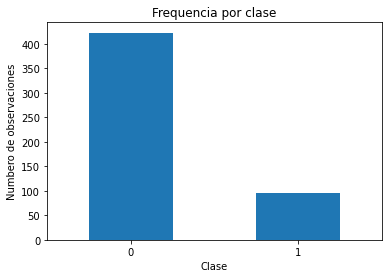

In [5]:
count_classes = pd.value_counts(data['CLUSTER_JERAR'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequencia por clase")
plt.xlabel("Clase")
plt.ylabel("Numbero de observaciones");

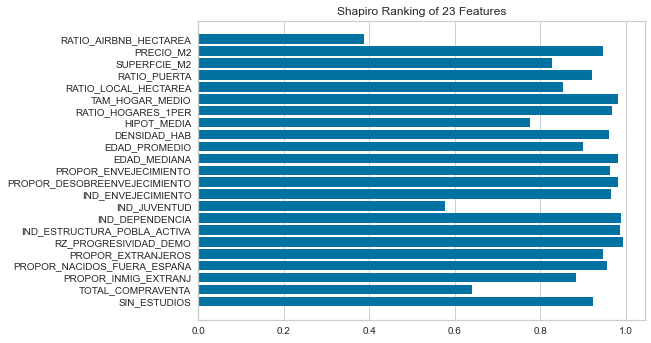

<AxesSubplot:title={'center':'Shapiro Ranking of 23 Features'}>

In [6]:
from yellowbrick.features import Rank1D

visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(numeric_data, data['CLUSTER_JERAR'])          
visualizer.transform(numeric_data)        
visualizer.show()  

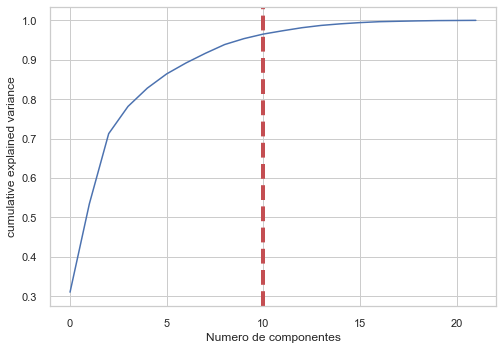

None

,Varianza acumulada Ratio,Explained Variance Ratio
0,0.310437,0.310437
1,0.534567,0.224131
2,0.712548,0.177980
3,0.781652,0.069105
4,0.828088,0.046436
5,0.864166,0.036078
6,0.891895,0.027729
7,0.916320,0.024425
8,0.938626,0.022306
9,0.953648,0.015022


In [7]:
pca_test = PCA(n_components=22)
pca_test.fit(data_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Varianza acumulada Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [8]:
pca = PCA(n_components=10)
pca.fit(data_scaled)
data_scaled_pca = pca.transform(data_scaled)
dim_pca=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',]

n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [dim_numericos[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df = pd.DataFrame(dic.items())
display(df)


,0,1
0,PC0,RATIO_HOGARES_1PER
1,PC1,PROPOR_INMIG_EXTRANJ
2,PC2,SIN_ESTUDIOS
3,PC3,HIPOT_MEDIA
4,PC4,TOTAL_COMPRAVENTA
5,PC5,PROPOR_DESOBREENVEJECIMIENTO
6,PC6,DENSIDAD_HAB
7,PC7,RZ_PROGRESIVIDAD_DEMO
8,PC8,RATIO_PUERTA
9,PC9,IND_DEPENDENCIA


In [9]:
#Dividir train y test
data_scaled = preprocessing.scale(numeric_data)
X_train, X_test, y_train, y_test = train_test_split(
                                        data_scaled_pca,
                                        data['CLUSTER_JERAR'], random_state = 0
                                    )

In [10]:
w=30
clf = RandomForestClassifier(class_weight={0: 1, 1: w})

param_grid = {"max_depth": range(6, 13), "n_estimators": [10, 50, 100, 200]}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=4)
grid_search.fit(X_train, y_train)

means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_['params']

for mean, std, pms in zip(means, stds, params):
    print("Precisión Media: {:.2f} +/- {:.2f} de los parametros {}".format(mean*100, std*100, pms))


Precisión Media: 98.71 +/- 0.45 de los parametros {'max_depth': 6, 'n_estimators': 10}
Precisión Media: 98.72 +/- 0.85 de los parametros {'max_depth': 6, 'n_estimators': 50}
Precisión Media: 98.97 +/- 0.73 de los parametros {'max_depth': 6, 'n_estimators': 100}
Precisión Media: 98.97 +/- 1.03 de los parametros {'max_depth': 6, 'n_estimators': 200}
Precisión Media: 98.46 +/- 0.52 de los parametros {'max_depth': 7, 'n_estimators': 10}
Precisión Media: 98.72 +/- 0.85 de los parametros {'max_depth': 7, 'n_estimators': 50}
Precisión Media: 98.97 +/- 1.03 de los parametros {'max_depth': 7, 'n_estimators': 100}
Precisión Media: 98.72 +/- 0.85 de los parametros {'max_depth': 7, 'n_estimators': 200}
Precisión Media: 98.20 +/- 1.33 de los parametros {'max_depth': 8, 'n_estimators': 10}
Precisión Media: 98.72 +/- 0.85 de los parametros {'max_depth': 8, 'n_estimators': 50}
Precisión Media: 98.97 +/- 1.03 de los parametros {'max_depth': 8, 'n_estimators': 100}
Precisión Media: 98.72 +/- 0.85 de los

<AxesSubplot:xlabel='n_estimators', ylabel='max_depth'>

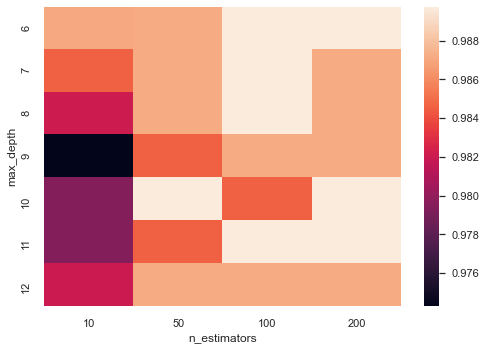

In [11]:
param1 = [x['max_depth'] for x in params]
param2 = [x['n_estimators'] for x in params]

precisions = pd.DataFrame(zip(param1, param2, means), columns=['max_depth', 'n_estimators', 'means'])
precisions = precisions.pivot('max_depth', 'n_estimators', 'means')
sns.heatmap(precisions)

Precisión:
97.6923076923077
Matriz de confusión:
[[102   1]
 [  2  25]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       103
           1       0.96      0.93      0.94        27

    accuracy                           0.98       130
   macro avg       0.97      0.96      0.96       130
weighted avg       0.98      0.98      0.98       130



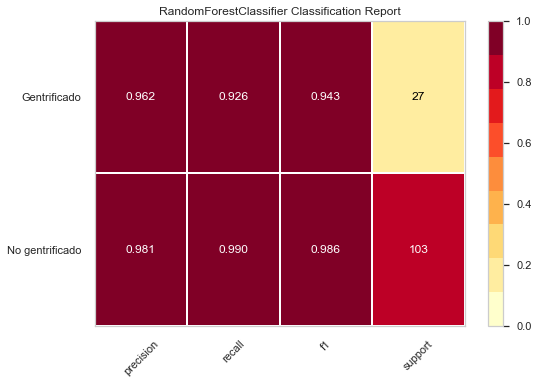

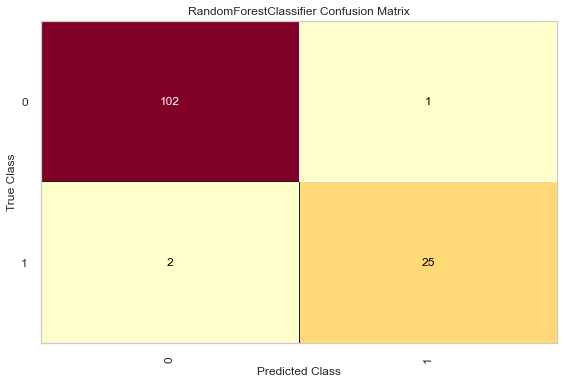

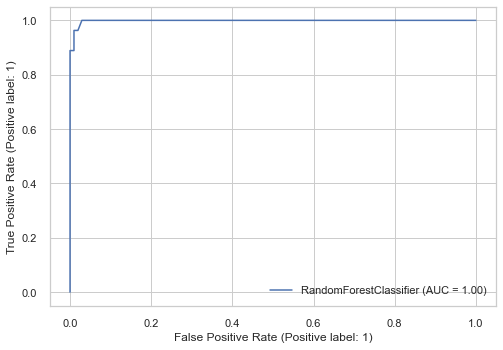

In [12]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC

clf = RandomForestClassifier(n_estimators = 50, max_depth = 11)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

accuracy = np.true_divide(np.sum(preds == y_test), preds.shape[0])*100
cnf_matrix = confusion_matrix(y_test, preds)

print('Precisión:')
print(accuracy)
print('Matriz de confusión:')
print(cnf_matrix)
print(classification_report(y_test, preds))

classes = ["No gentrificado", "Gentrificado"]
visualizer = ClassificationReport(clf, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

cm = ConfusionMatrix(clf, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(clf, X_test, y_test, ax=ax)
plt.show()


In [ ]:
from yellowbrick.model_selection import learning_curve

print(learning_curve(clf, data_scaled_pca, data['CLUSTER_JERAR'], cv=10, scoring='accuracy'))

In [33]:
#predictores
predictores = pd.DataFrame({'pred': dim_pca,'imp': clf.feature_importances_} )
print(predictores.sort_values(['imp'],ascending=False))


  pred       imp
0  PC0  0.403301
2  PC2  0.228958
1  PC1  0.090250
5  PC5  0.058866
3  PC3  0.047766
4  PC4  0.038635
9  PC9  0.036215
6  PC6  0.033847
7  PC7  0.032633
8  PC8  0.029530


In [112]:
predicciones = clf.predict_proba(X = data_scaled_pca)
df_predicciones = pd.DataFrame(data=predicciones, columns=['0', '1'])
display(df_predicciones)

,0,1
0,1.00,0.00
1,1.00,0.00
2,1.00,0.00
3,1.00,0.00
4,0.96,0.04
...,...,...
514,1.00,0.00
515,1.00,0.00
516,1.00,0.00
517,1.00,0.00


Precisión Media: 100.00 +/- 0.00 de los parametros {'n_neighbors': 1, 'weights': 'uniform'}
Precisión Media: 100.00 +/- 0.00 de los parametros {'n_neighbors': 1, 'weights': 'distance'}
Precisión Media: 100.00 +/- 0.00 de los parametros {'n_neighbors': 2, 'weights': 'uniform'}
Precisión Media: 100.00 +/- 0.00 de los parametros {'n_neighbors': 2, 'weights': 'distance'}
Precisión Media: 100.00 +/- 0.00 de los parametros {'n_neighbors': 3, 'weights': 'uniform'}
Precisión Media: 100.00 +/- 0.00 de los parametros {'n_neighbors': 3, 'weights': 'distance'}
Precisión Media: 99.74 +/- 0.44 de los parametros {'n_neighbors': 4, 'weights': 'uniform'}
Precisión Media: 100.00 +/- 0.00 de los parametros {'n_neighbors': 4, 'weights': 'distance'}
Precisión Media: 99.49 +/- 0.88 de los parametros {'n_neighbors': 5, 'weights': 'uniform'}
Precisión Media: 100.00 +/- 0.00 de los parametros {'n_neighbors': 5, 'weights': 'distance'}
Precisión Media: 99.23 +/- 0.85 de los parametros {'n_neighbors': 6, 'weights

<AxesSubplot:xlabel='weights', ylabel='n_neighbors'>

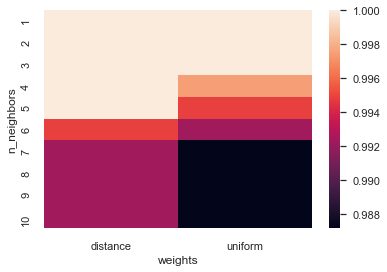

In [113]:

#KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
            
param_grid = {"n_neighbors": range(1, 11), "weights": ["uniform", "distance"]}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=4)

grid_search.fit(X_train, y_train)

means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_['params']

for mean, std, pms in zip(means, stds, params):
    print("Precisión Media: {:.2f} +/- {:.2f} de los parametros {}".format(mean*100, std*100, pms))
    
import seaborn as sns

param1 = [x['n_neighbors'] for x in params]
param2 = [x['weights'] for x in params]

precisions = pd.DataFrame(zip(param1, param2, means), columns=['n_neighbors', 'weights', 'means'])
precisions = precisions.pivot('n_neighbors', 'weights', 'means')
sns.heatmap(precisions)



Precisión:
99.23076923076923
Matriz de confusión:
[[102   1]
 [  0  27]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       103
           1       0.96      1.00      0.98        27

    accuracy                           0.99       130
   macro avg       0.98      1.00      0.99       130
weighted avg       0.99      0.99      0.99       130



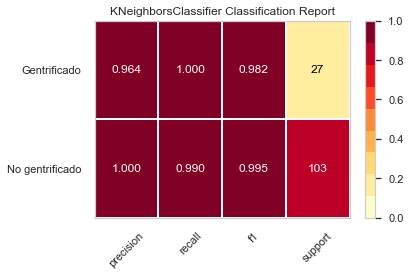

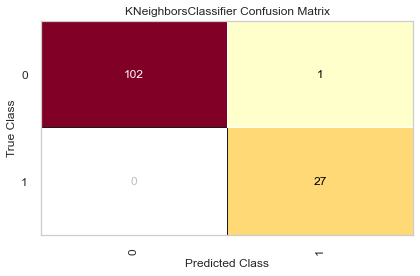

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [114]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix

clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix

preds = clf.predict(X_test)

accuracy = np.true_divide(np.sum(preds == y_test), preds.shape[0])*100
cnf_matrix = confusion_matrix(y_test, preds)

print('Precisión:')
print(accuracy)
print('Matriz de confusión:')
print(cnf_matrix)

print(classification_report(y_test, preds))


classes = ["No gentrificado", "Gentrificado"]
visualizer = ClassificationReport(clf, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

cm = ConfusionMatrix(clf, classes=[0,1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()




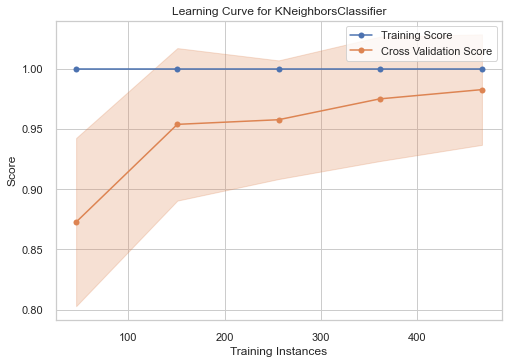

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>,
              cv=10, estimator=KNeighborsClassifier(weights='distance'),
              scoring='accuracy')


In [84]:
from yellowbrick.model_selection import learning_curve

print(learning_curve(clf, data_scaled_pca, data['CLUSTER_JERAR'], cv=10, scoring='accuracy'))